<a href="https://colab.research.google.com/github/TNH510/Artificial-Intelligence/blob/main/water_level_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Điều khiển mực nước dùng fuzzy logic

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=55b25ad74ba4ff5ebe59868dc656d84f0b2566b37fdc2ad417b63a8ef0f1499e
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [31]:
universe = np.linspace(-1,1,200) 
universe1 = np.linspace(0,1,200)
level = ctrl.Antecedent(universe, 'level')
valve = ctrl.Consequent(universe1, 'valve')

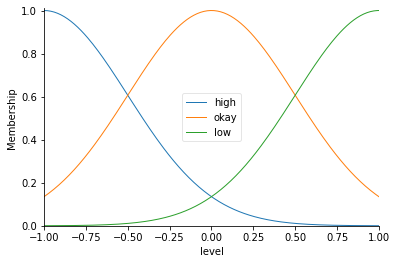

In [32]:
level['high'] = fuzzy.gaussmf(level.universe,-1,0.5)
level['okay'] = fuzzy.gaussmf(level.universe,0,0.5)
level['low'] = fuzzy.gaussmf(level.universe,1,0.5)
level.view()

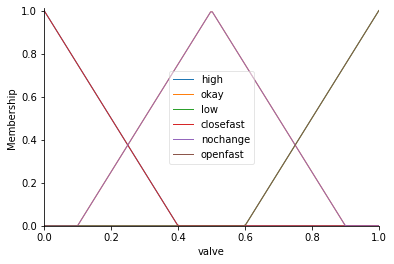

In [34]:
valve['closefast'] = fuzzy.trimf(valve.universe,[0,0,0.4])
valve['nochange'] = fuzzy.trimf(valve.universe,[0.1,0.5,0.9])
valve['openfast'] = fuzzy.trimf(valve.universe,[0.6,1,1])
valve.view()

In [36]:
rule1 = ctrl.Rule(level['okay'], valve['nochange'])
rule2 = ctrl.Rule(level['low'], valve['openfast'])
rule3 = ctrl.Rule(level['high'], valve['closefast'])

     

In [41]:
from matplotlib.legend import time
import matplotlib
from skfuzzy.control.controlsystem import ControlSystemSimulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

System  = ctrl.ControlSystem(rules = [rule1, rule2, rule3])
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61+1)
upSampled1 = np.linspace(-1,1,61)
upSampled2 = np.linspace(0,1,61)
#x,y = np.meshgrid(upSampled1, upSampled2)
x = np.linspace(-1,1,61)
z = np.zeros_like(x)


In [42]:
for i in range(61):
  sim.input['level']= x[i]
  sim.compute()
  z[i]=sim.output['valve']

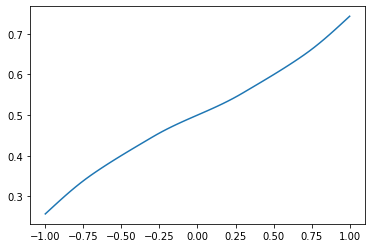

In [43]:
plt.plot(x,z) 